In [1]:
from spec_id import Gen_spec, Likelihood_contours
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
galDB = pd.read_pickle('../data/upd_galDB.pkl').sort_values('z_grism')

metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [3]:
def Plot_spec(wv,fl,er,mfl,s1,s2,s3,gid):
    ### s1 is row, s2 will determine column, s3 deterimes width
    if s2 == 0:
        plt.subplot(gs[s1,:s3-1])
    if s2 == 1:
        plt.subplot(gs[s1,s3+1:-1])

    lim = np.std(fl - mfl)*4

    IDX = []

    for u in range(len(fl)-2):
        if np.abs(fl[u] - mfl[u]) < lim:
            IDX.append(u)    

    yax = [0,1,2,3,4,5]
    xax = [3200,3400,3600,3800,4000,4200,4400,4600,4800,5000,5200,5400]
    
    ny = []
    for i in yax:
        if i < max(fl[IDX]*1E18):
            ny.append(i)
    
    if len(ny)==1:
        ny=[0,1]
    
    nx = []
    
    for i in xax:
        if min(wv[IDX]) < i < max(wv[IDX]):
            nx.append(i)
            
    plt.errorbar(wv[IDX], fl[IDX]*1E18, er[IDX]*1E18,linestyle='None', linewidth = 0.75, marker='o', markersize=1, color='k')
    plt.plot(wv,mfl*1E18,'r',linewidth=2)
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    if max(wv) > 4870:
        plt.axvline(4862.68,linestyle='--', alpha=.3)
        plt.axvspan(4810, 4910, color='k', alpha=.1)

    if max(wv) > 5180:
        plt.axvline(5176.7,linestyle='--', alpha=.3)
        plt.axvspan(5120, 5240, color='k', alpha=.1)
    
    if gid[0] == 's':
        intext='GSD'
        
    if gid[0] == 'n':
        intext='GND'
        
    plt.text(max(wv)*.93,max(fl[IDX]*1E18 *0.15),intext + gid[1:],fontsize=15,backgroundcolor=[.3,.3,.3],color='w')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xlim(min(wv)*0.99,max(wv)*1.01)
    if gid == 's39012':
        plt.ylim(0,0.75)
        plt.yticks([0,.5])

    else:
        plt.ylim(0,max(fl[IDX]*1E18 *1.05))
        plt.yticks(ny)

    plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=15)
    plt.ylabel('F$_\lambda$',size=15)
    plt.xticks(nx)
    
    
def Plot_dist(P,levels,s1,s2,s3):
    ### s1 is row, s2 will determine column
    P[P < levels[0]] = 0
    if s2 == 0:
        ax = plt.subplot(gs[s1,s3-1 ])
        plt.gca().tick_params(axis='y',labelleft='off')
        plt.gca().tick_params(axis='y',labelright='on')

    if s2 == 1:
        ax = plt.subplot(gs[s1, -1])
        plt.gca().tick_params(axis='y',labelleft='off')
        plt.gca().tick_params(axis='y',labelright='on')
    plt.contour(M,A,P,levels,colors='k',linewidths=2)
    plt.contourf(M,A,P,40,cmap=cmap)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.axis([0,0.032,0,6.3])
    plt.xticks([ 0.0095, 0.019, 0.0285 ],[.5,1.0,1.5])
    plt.yticks([0,2,4,6])
    plt.xlabel('Z (Z/Z$_\odot$)',size=15)
    plt.ylabel('t (Gyr)',size=15)
    ax.yaxis.set_label_position("right")

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

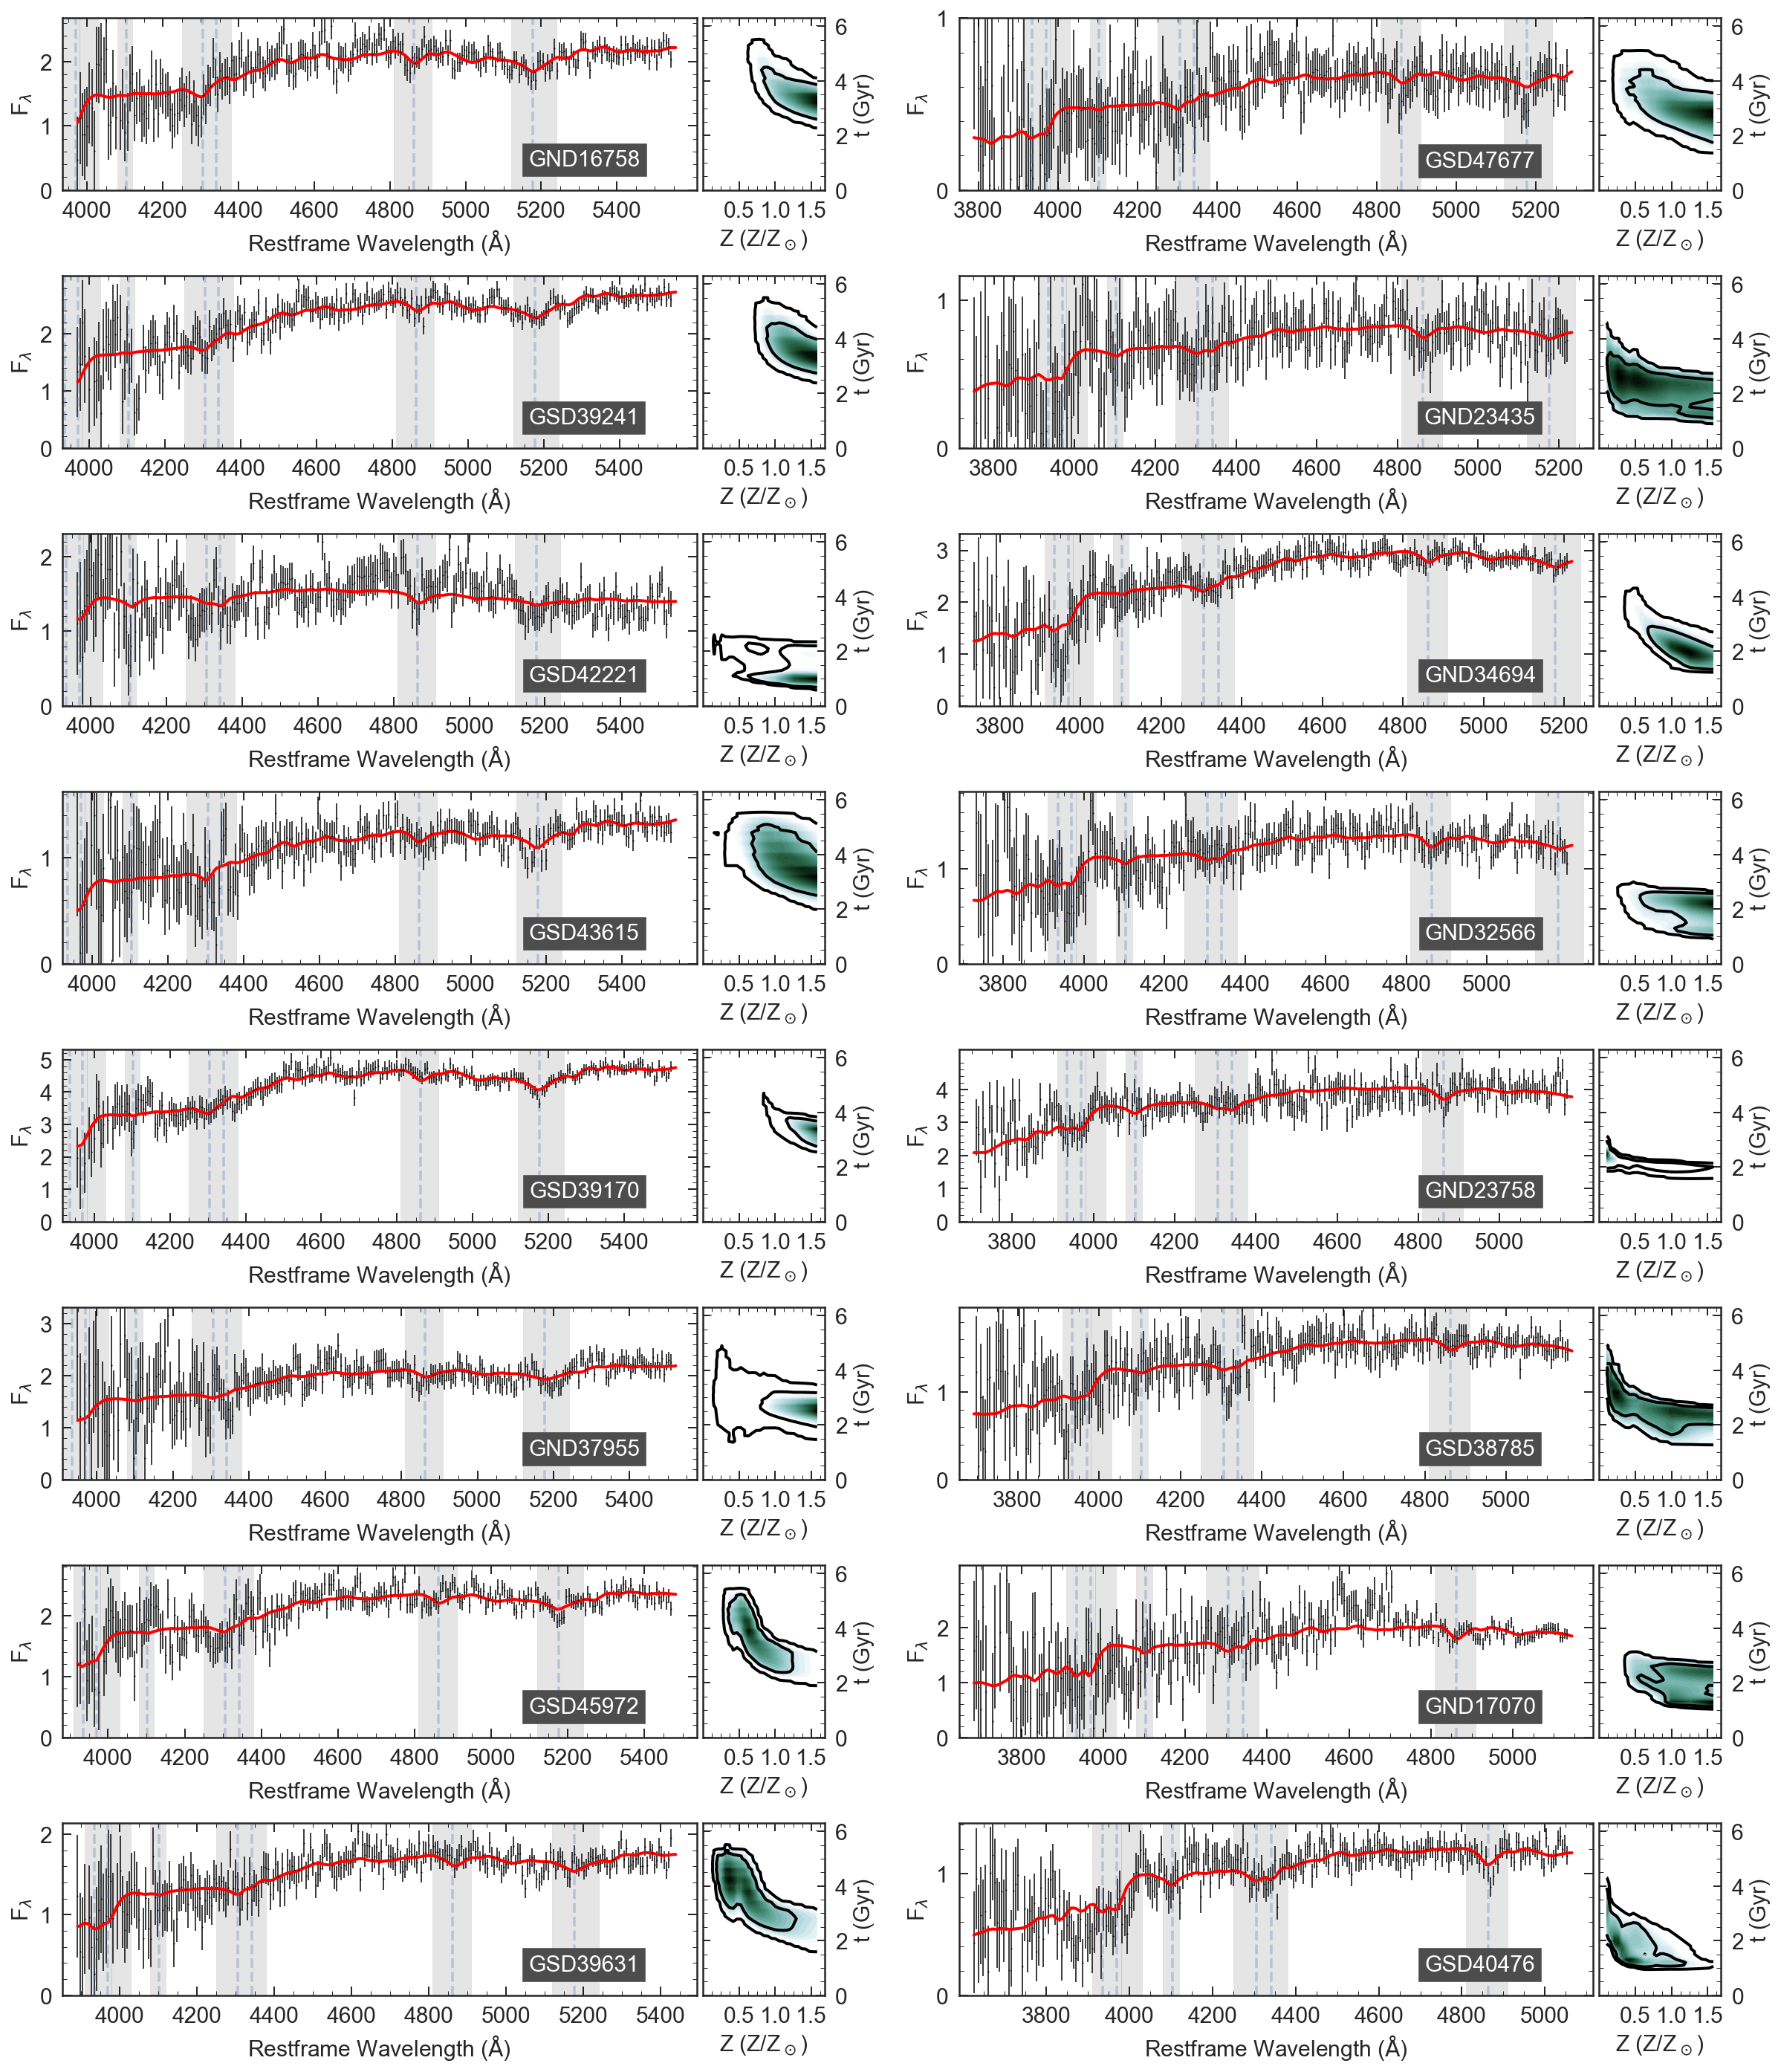

In [4]:
gs = GridSpec(16,13,wspace=0.05,hspace=0.5)

plt.figure(figsize=[20,50])

for i in range(2):
    for ii in range(8):
        P =  np.load('../chidat/{0}_full_fit_tZ_pos.npy'.format(galDB.gids[galDB.index[i*8 + ii]]))
        onesig,twosig = Likelihood_contours(age,metal,P)
        levels = np.array([twosig,onesig])
        sp = Gen_spec(galDB.gids[galDB.index[i*8 + ii]],galDB.z_grism[galDB.index[i*8 + ii]],minwv=8000)
        sp.Fit_lwa(galDB.Z[galDB.index[i*8 + ii]],np.round(galDB.t[galDB.index[i*8 + ii]],1),
                   galDB.z_grism[galDB.index[i*8 + ii]],galDB.d[galDB.index[i*8 + ii]],metal,age,tau)
        Plot_spec(sp.gal_wv_rf,sp.gal_fl,sp.gal_er,sp.fl,ii,i,6,galDB.gids[galDB.index[i*8 + ii]])
        Plot_dist(P,levels,ii,i,6)
plt.savefig('../plots/all_spec_1.pdf',bbox_inches = 'tight')

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

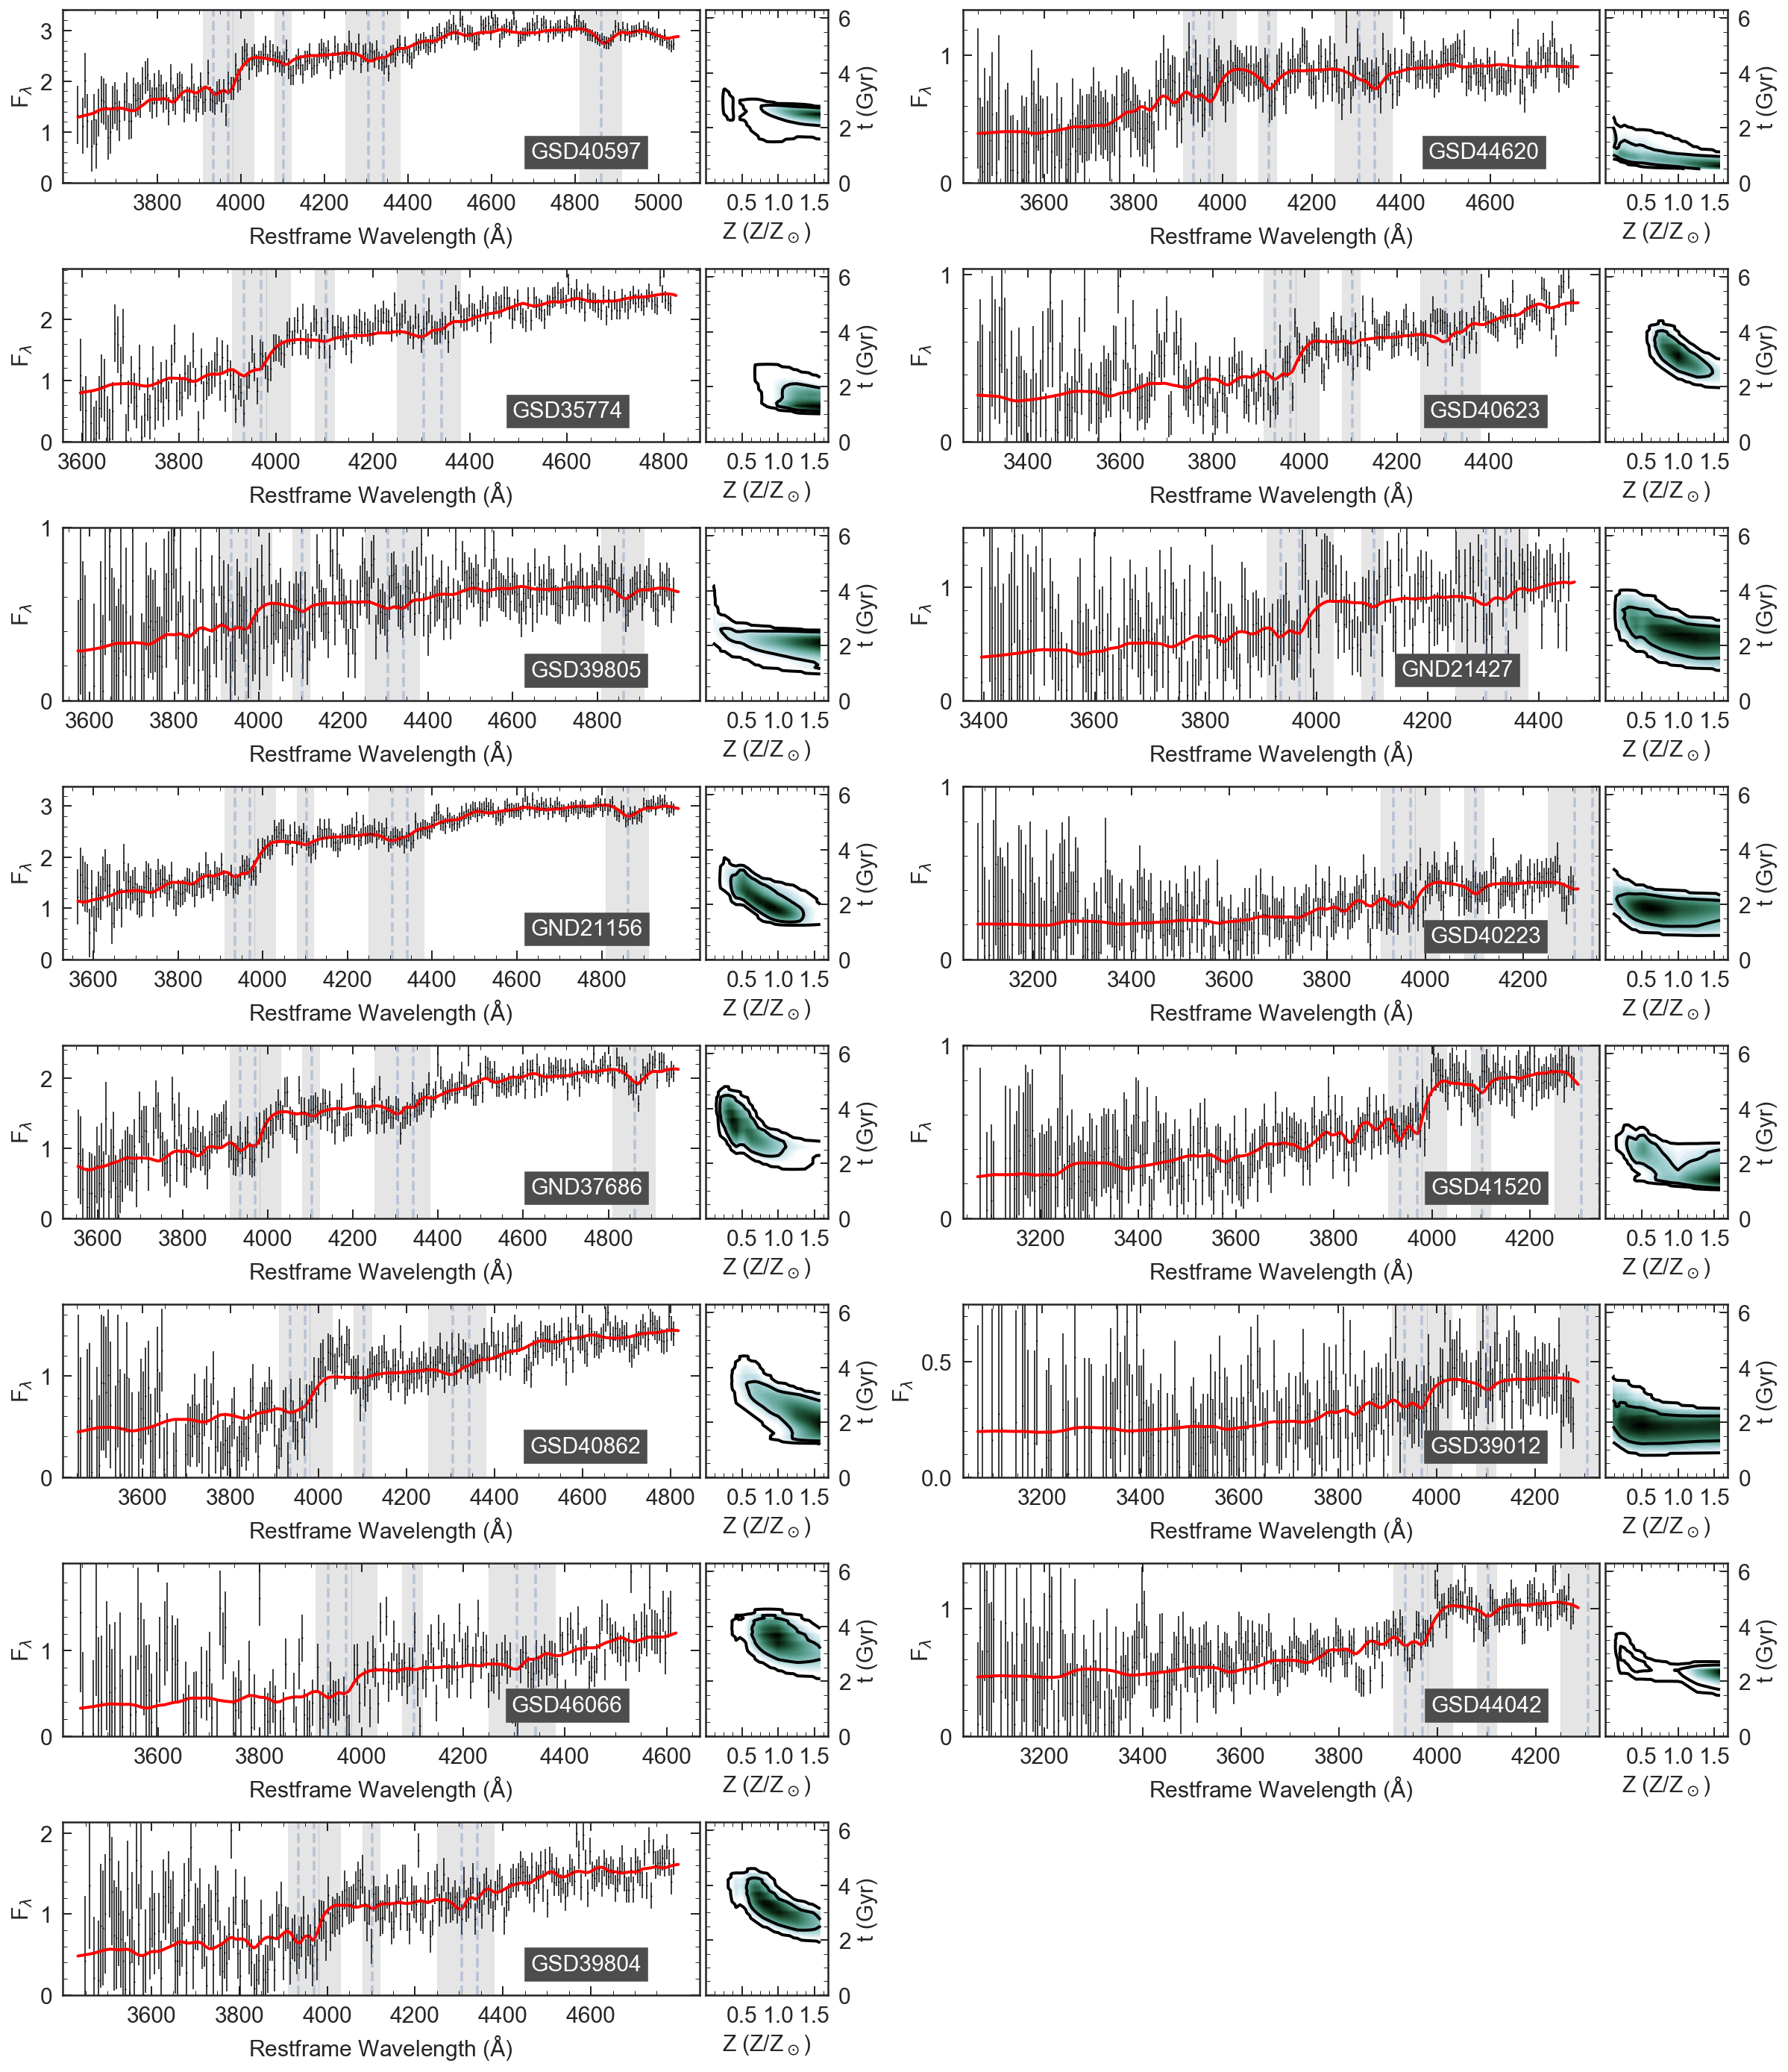

In [5]:
gs = GridSpec(16,13,wspace=0.05,hspace=0.5)

plt.figure(figsize=[20,50])

for i in range(2):
    for ii in range(8):
        if (i*8 + ii) != 15:
            P =  np.load('../chidat/{0}_full_fit_tZ_pos.npy'.format(galDB.gids[galDB.index[i*8 + ii + 16]]))
            onesig,twosig = Likelihood_contours(age,metal,P)
            levels = np.array([twosig,onesig])
            sp = Gen_spec(galDB.gids[galDB.index[i*8 + ii + 16]],galDB.z_grism[galDB.index[i*8 + ii + 16]],minwv=8000)
            sp.Fit_lwa(galDB.Z[galDB.index[i*8 + ii + 16]],np.round(galDB.t[galDB.index[i*8 + ii + 16]],1),
                       galDB.z_grism[galDB.index[i*8 + ii + 16]],galDB.d[galDB.index[i*8 + ii + 16]],metal,age,tau)
            Plot_spec(sp.gal_wv_rf,sp.gal_fl,sp.gal_er,sp.fl,ii,i,6,galDB.gids[galDB.index[i*8 + ii + 16]])
            Plot_dist(P,levels,ii,i,6)
plt.savefig('../plots/all_spec_2.pdf',bbox_inches = 'tight')

In [8]:
galDB

,gids,z_grism,z_grism_+,z_grism_-,Z,Z_l,Z_h,Zx,Zx_l,Zx_h,...,taux_l,taux_h,d,d_l,d_h,dx,dx_l,dx_h,l_mass,SNR
0,n16758,1.015,0.003,0.004,0.024,0.007,0.004,0.023547,0.006228,0.004657,...,0.217872,0.229976,0.1,0.084,0.038,0.058116,0.042084,0.080160,10.83,10.905958
14,s39241,1.017,0.003,0.002,0.024,0.006,0.004,0.023435,0.005106,0.004433,...,0.187612,0.217872,0.2,0.130,0.071,0.160321,0.090180,0.110220,10.87,12.732119
24,s42221,1.018,0.112,0.008,0.023,0.009,0.005,0.022874,0.009315,0.004994,...,0.187612,0.665721,0.2,0.128,0.169,0.194389,0.122244,0.174349,10.51,7.575737
25,s43615,1.020,0.004,0.007,0.022,0.008,0.005,0.021415,0.007014,0.005780,...,0.187612,0.248132,0.5,0.183,0.175,0.478958,0.162325,0.196393,10.69,7.645023
13,s39170,1.023,0.001,0.002,0.028,0.004,0.001,0.027643,0.003255,0.001739,...,0.211820,0.096832,0.1,0.090,-0.024,0.036072,0.026052,0.040080,11.09,21.512867
9,n37955,1.027,0.005,0.008,0.025,0.010,0.003,0.024108,0.009202,0.004377,...,0.314704,0.211820,0.7,0.313,0.156,0.631263,0.244489,0.224449,10.85,7.722264
28,s45972,1.041,0.004,0.004,0.014,0.004,0.008,0.013896,0.004152,0.007631,...,0.181560,0.248132,0.1,0.080,0.052,0.070140,0.050100,0.084168,10.87,12.760478
15,s39631,1.057,0.007,0.021,0.012,0.005,0.009,0.011764,0.005218,0.009315,...,0.169456,0.242080,0.2,0.120,0.109,0.186373,0.106212,0.122244,10.69,9.434903
30,s47677,1.117,0.006,0.011,0.020,0.009,0.007,0.020012,0.008641,0.007014,...,0.199716,0.260236,0.3,0.176,0.191,0.282565,0.158317,0.208417,10.09,4.503832
4,n23435,1.139,0.012,0.012,0.014,0.008,0.011,0.013896,0.008192,0.010774,...,0.242080,0.338912,0.4,0.218,0.255,0.384770,0.202405,0.270541,10.27,4.719428


In [63]:
sp = Gen_spec(galDB.gids[12],galDB.z_grism[12],minwv=8000)
sp.Fit_lwa(galDB.Z[12],np.round(galDB.t[12],1),
           galDB.z_grism[12],galDB.d[12],metal,age,tau)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

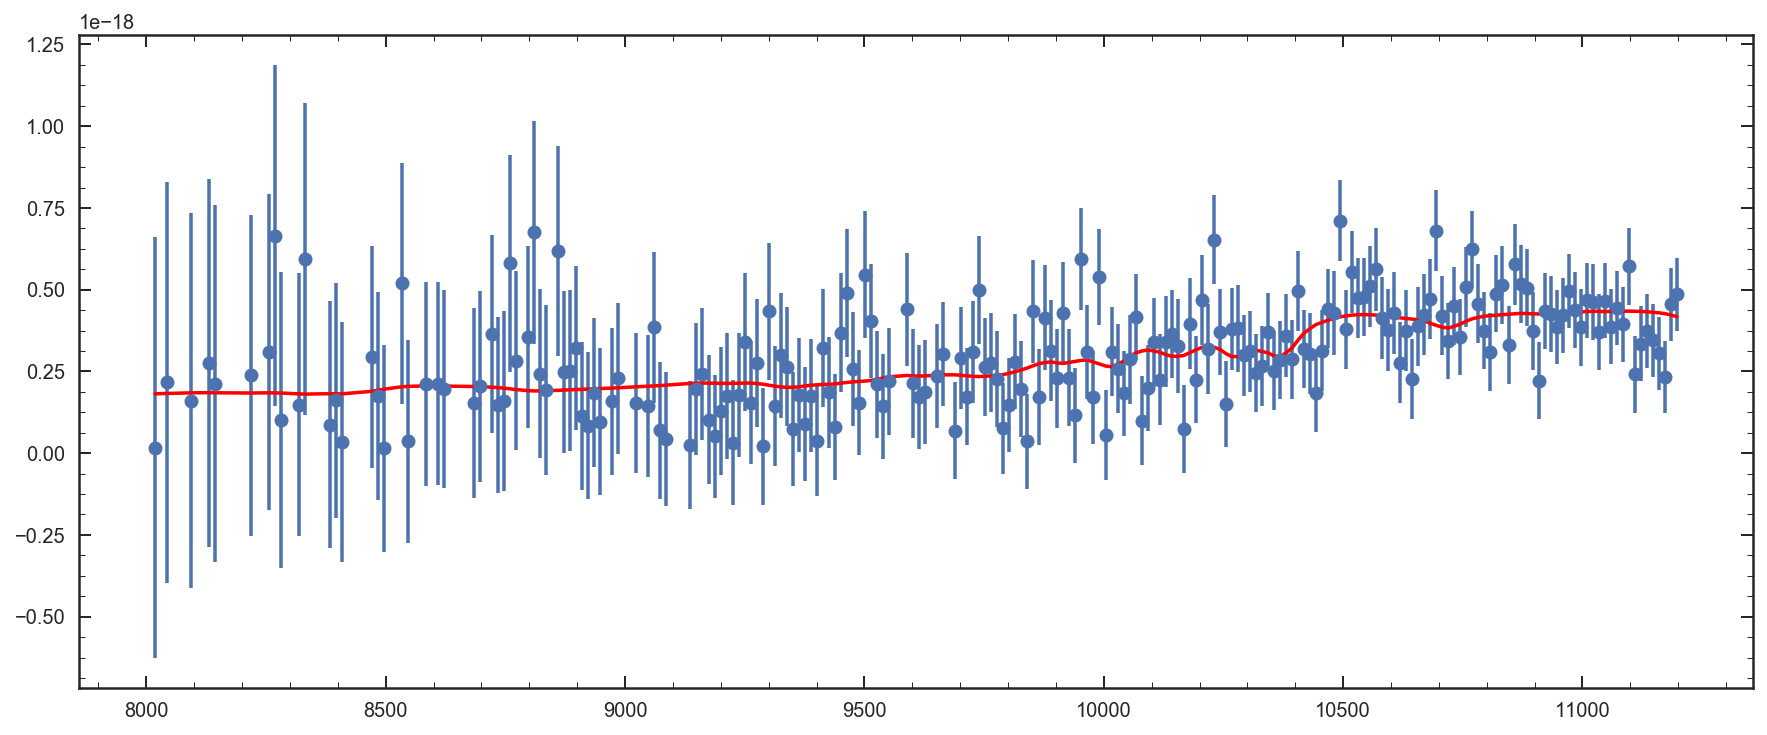

In [64]:
plt.figure(figsize=[15,6])
plt.errorbar(sp.gal_wv,sp.gal_fl,sp.gal_er,fmt='o')
plt.plot(sp.gal_wv,sp.fl,'r')
plt.ylim()

<ErrorbarContainer object of 3 artists>

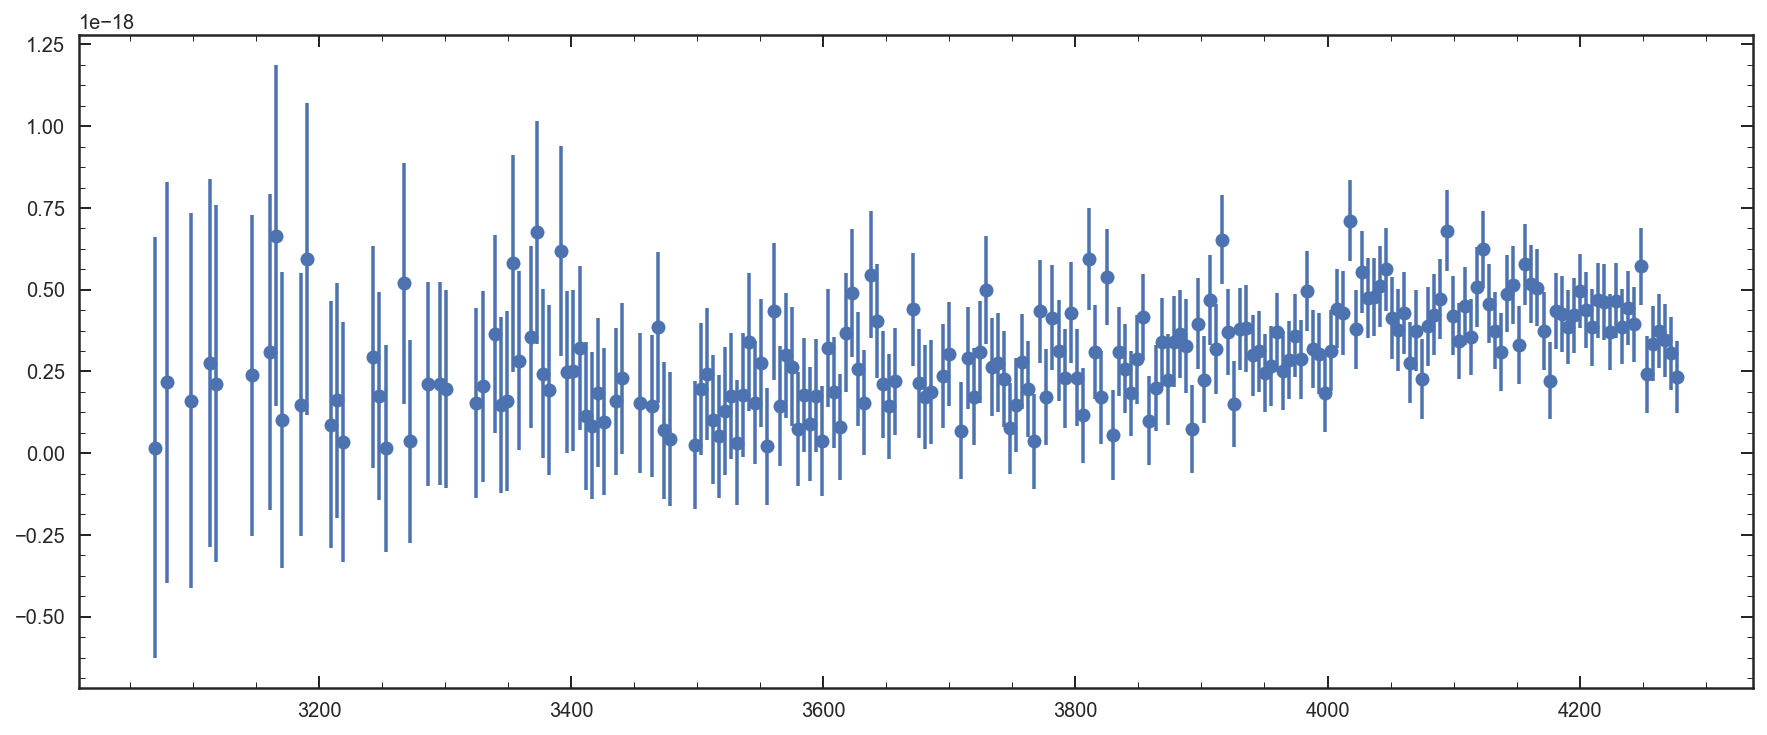

In [66]:
plt.figure(figsize=[15,6])
plt.errorbar(sp.gal_wv_rf[IDX],sp.gal_fl[IDX],sp.gal_er[IDX],fmt='o')

(array([ 17.,  55., 132.,  37.,   7.,   1.,   1.,   0.,   0.,   1.]),
 array([-1.12082247e-18, -6.35729071e-19, -1.50635670e-19,  3.34457731e-19,
         8.19551133e-19,  1.30464453e-18,  1.78973794e-18,  2.27483134e-18,
         2.75992474e-18,  3.24501814e-18,  3.73011154e-18]),
 <a list of 10 Patch objects>)

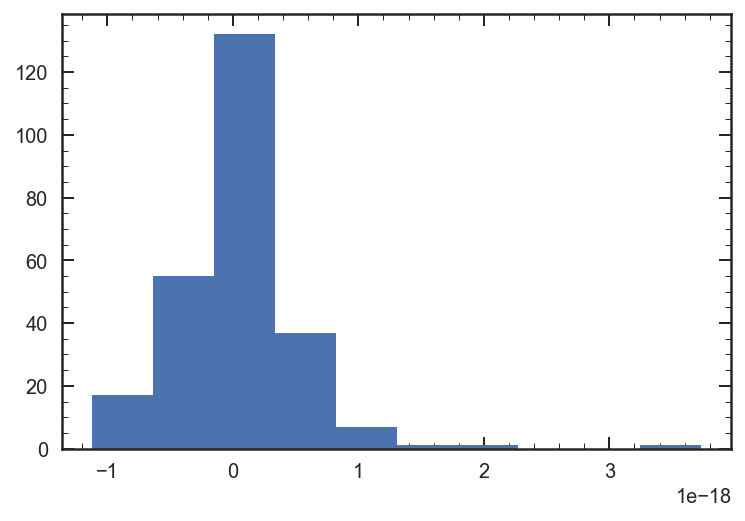

In [43]:
plt.hist(sp.gal_fl - sp.fl)

In [65]:
lim = np.std(sp.gal_fl - sp.fl)*4

IDX = []

for i in range(len(sp.gal_fl)-2):
    if np.abs(sp.gal_fl[i] - sp.fl[i]) < lim:
        IDX.append(i)


In [57]:
z,Pz = np.load('../rshift_dat/s35774_zfit_Pz.npy')
zf,Pzf = np.load('../chidat/s35774_full_fit_rs_pos.npy')

(1.18, 1.25)

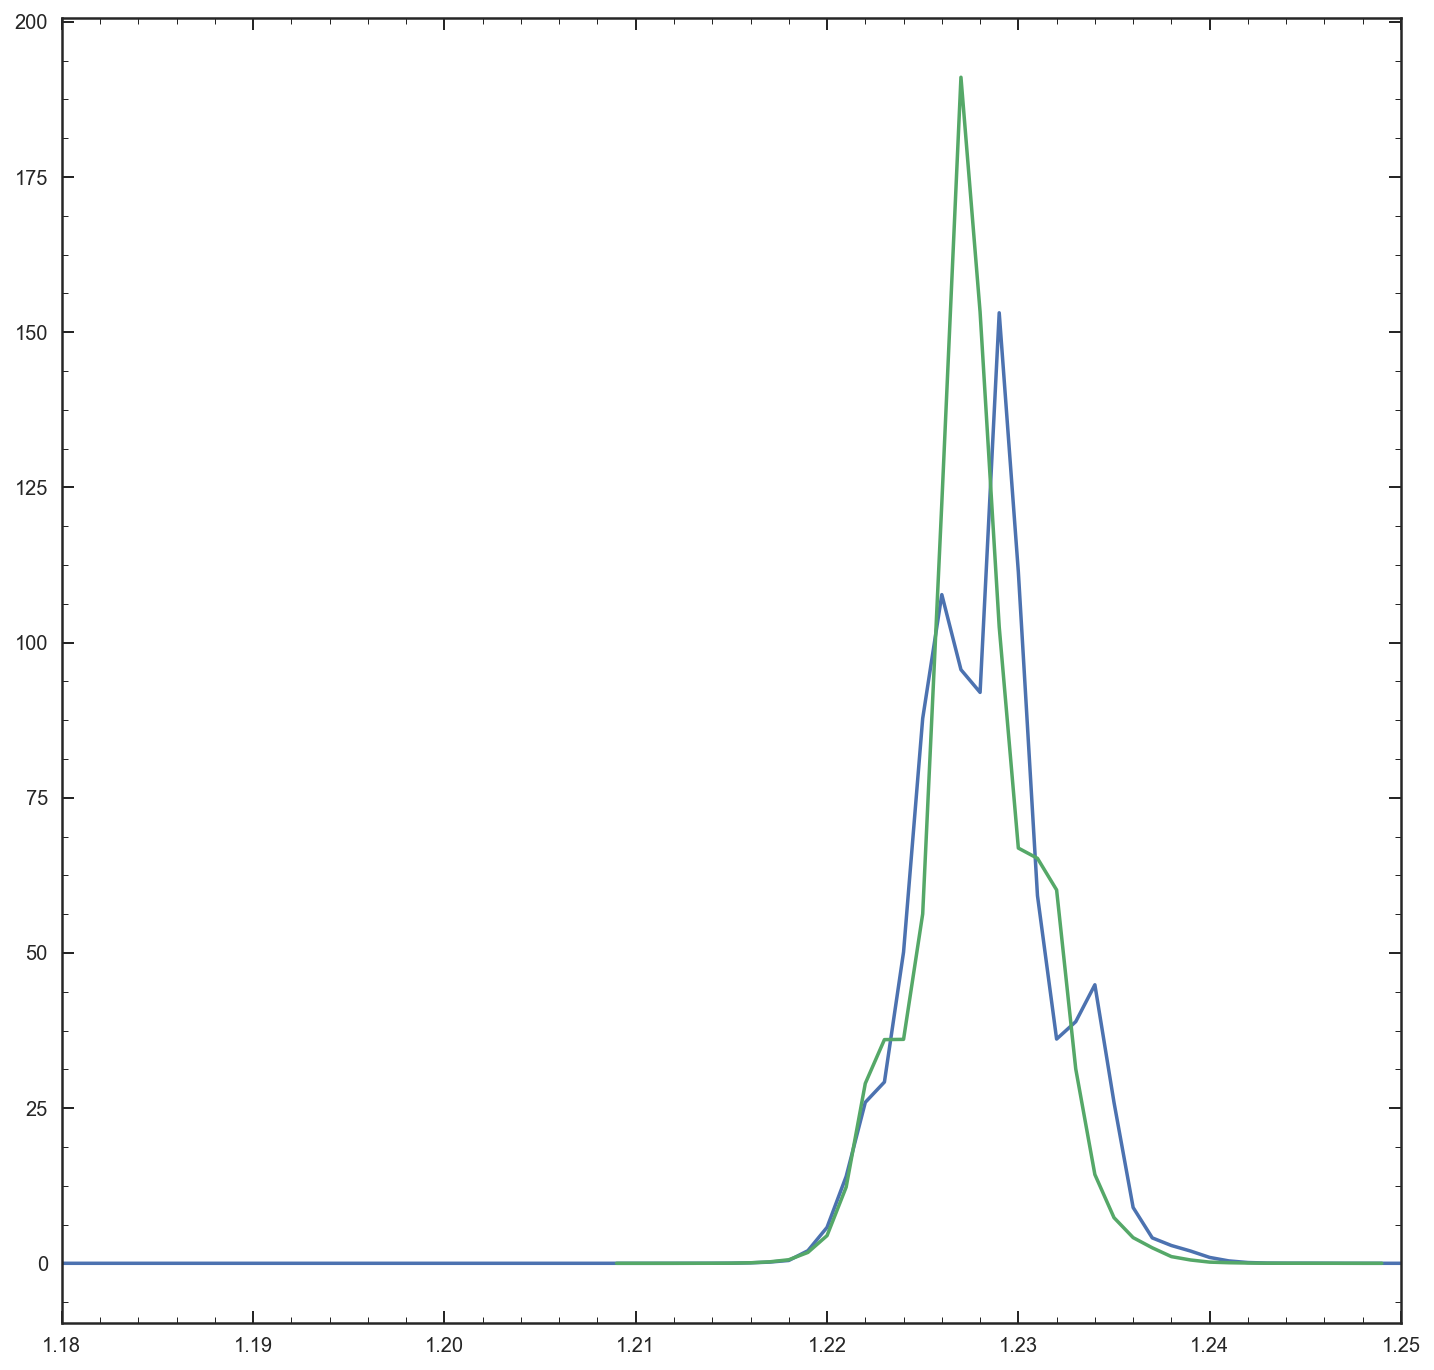

In [58]:
plt.figure(figsize=[12,12])
plt.plot(z,Pz)
plt.plot(zf,Pzf)
plt.xlim(1.18,1.25)